# Titanic Survival Kaggle Dataset

## 1. Data Reading

Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

To load both datasets, train and test. Also I will join them to be able to study and work with missing values better.

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
idx_train = df_train['PassengerId']
idx_test = df_test['PassengerId']
df_all = pd.concat([df_train, df_test],
                  axis = 0, sort = False)
df_all.set_index('PassengerId',
                drop = True,
                inplace = True)
df_all.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [6]:
df_all.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


We check now each column data type and the amount of NaN values.

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


We can see that the next variables have NaN that we will need to solve:
- Age = 263 NaN values.
- Fare = 1 NaN value.
- Cabin = 1014 NaN values.
- Embarked = 2 NaN values.

Now we should identify and describe each feature:

- Categorical features:
    - Pclass: Ordinal feature that shows the class of the ticket. 1: 1st Class, 2: 2nd Class, 3: 3rd Class
    - Sex: Categorical feature that identifies the genre.
    - Embarked: Categorical feature that identifies the port in which the passenger embarked.
    - Survived: Categorical feature that shows whether the passenger survived or not.

- Numerical features:
    - Age: Continuous numerical feature of the age of the passenger.
    - Fare: Continuous numerical feature of the cost of the ticket.
    - SibSp: Discrete numerical feature showing the amount of siblings and spouse in the boat.
    - Parch: Discrete numerical feature showing the amount of parents and children in the boat.

- Other features:
    - Name: Name of the passenger, we will use this feature to derive others more useful.
    - Ticket: Ticket number of the passenger, we might use this feature to derive passengers that bought the ticket together.

In [8]:
df_all.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


With just the initial information we can extract some insights:

- The target feature is not completely balance, there are more people that died than that survived (38.3% - 61.7%)
- More than half of the people were traveling in 3rd class and less than 25% were 1st class.
- There were more male passengers that females (64.4% - 35.6%)
- Most of the ticket fares were between 7 and 31 but there were some free ones and some very expensive.
- Most of the people embarked at S.

## 2. Data Cleaning

### 2.1. Columns Preparation

#### 2.1.1. Sex

We map the sex column to be numerical, so we can use it for NaN filling. Male: 0, Female: 1.

In [9]:
sex_dict = {'male': 0, 'female': 1}
df_all['Sex'] = df_all['Sex'].map(sex_dict)

#### 2.1.2. Embarked

We can perform the same action to embarked.

In [10]:
embarked_dict = {'S': 0, 'C': 1, 'Q': 2}
df_all['Embarked'] = df_all['Embarked'].map(embarked_dict)

In [11]:
df_all

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0.0
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1.0
1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0


#### 2.1.3. Fare

We can also take advantage of Fare if we bine the feature converting it to discrete instead of continuous. But first we have to solve the missing value, and as it is just one, we can use the median aggregated by Pclass to fill it.

In [12]:
df_all['Fare'].fillna(df_all.groupby('Pclass')['Fare'].transform('median'),
                     inplace = True)
df_all['Fare_bin'] = pd.cut(df_all['Fare'],
                       5,
                       labels = [0,1,2,3,4])

In [13]:
df_all['Fare_bin'] = df_all['Fare_bin'].astype('int64')

#### 2.1.4. Age

To substitute Age NaNs we can find some correlation with other features and then use the aggregated medians to fill them.

In [14]:
df_age_corr = df_all.drop(['Name', 'Ticket','Cabin'],
                         axis = 1)

In [15]:
df_age_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1307 non-null   float64
 8   Fare_bin  1309 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 102.3 KB


<AxesSubplot:>

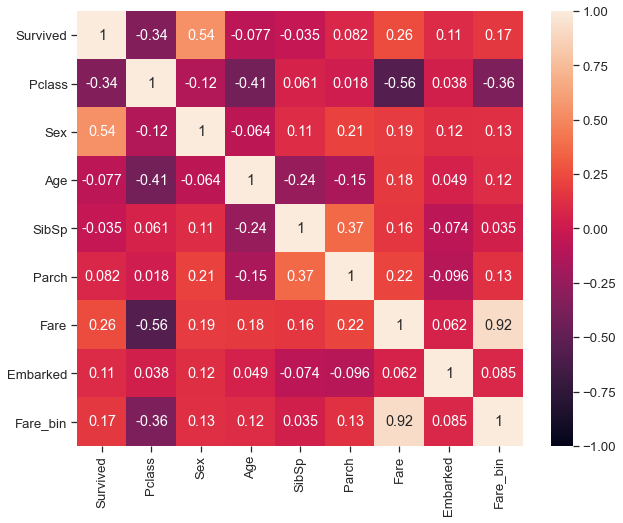

In [16]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.heatmap(df_age_corr.corr(),
           vmin = -1,
           vmax = 1,
           annot = True)

The highest correlation with age are Pclass, SibSp, Parch and Fare, so we can use them to aggregate the ages and take the means to substitute the NaN values.

In [17]:
pd.set_option('display.max_rows', 500)
df_age_corr.groupby(['Pclass','SibSp','Parch','Fare_bin'])['Age'].median()

Pclass  SibSp  Parch  Fare_bin
1       0      0      0           41.50
                      1           35.00
                      2           36.00
                      4           35.00
               1      0           30.00
                      1           48.00
                      2           33.50
                      4           47.00
               2      0           20.50
                      1           24.00
                      2           27.00
        1      0      0           38.00
                      1           27.00
                      2           55.00
               1      0           52.00
                      1           45.00
                      2           50.00
               2      0           27.00
                      1           19.50
               3      2           54.50
               4      2           62.00
        2      0      0           54.00
                      1           50.00
               2      2           18.00
        3

In [18]:
df_all['Age'].fillna(df_all.groupby(['Pclass','SibSp','Parch','Fare_bin'])['Age'].transform('median'),
                     inplace = True)

In [19]:
df_all[df_all['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_bin
PassengerId,,,,,,,,,,,,
1234,NaN,3,"Sage, Mr. John George",0,NaN,1,9,CA. 2343,69.55,NaN,0.0,0
1257,NaN,3,"Sage, Mrs. John (Annie Bullen)",1,NaN,1,9,CA. 2343,69.55,NaN,0.0,0


The age of this two passengers are not filled because there is no more passengers with its combination of Pclass, SibSp, Parch and Fara. Therefore I will fill them removing SibSp and Parch.

In [20]:
df_all['Age'].fillna(df_all.groupby(['Pclass','Fare_bin'])['Age'].transform('median'),
                     inplace = True)
df_all.drop('Fare_bin',
           inplace = True,
           axis = 1)

I drop the binned fare column because I am not sure yet how to use Fare feature in the models.

#### 2.1.5. Embarked

There are two missing values in embarked feature

In [21]:
df_all[df_all['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


They happen to have the same ticket number, therefore they should have embarked from the same place. Looking for the names in internet, they did from Southampton, therefore I can replace NaN with a 0.

In [22]:
df_all['Embarked'].fillna(0, inplace = True)

#### 2.1.6. Cabin

The next feature to correct is embarked but it shows a 77% of missing values. First we should identify if it is worth to spend time on it.

I will start substituting NaN values with Other.

Also the cabin is compound by a letter and a number. The letter is likely to show the area in the boat and then the number should say specifically the room.

They area where you have the room seems that can be important to survive. Depends on how close it is from the deck or if it is closer to the sinking part of the boat, etc.

In [23]:
df_all['Cabin'].fillna('Other', inplace = True)

In [24]:
df_all['Cabin_Letter'] = df_all['Cabin'].str[0]

<AxesSubplot:xlabel='Cabin_Letter', ylabel='Cabin'>

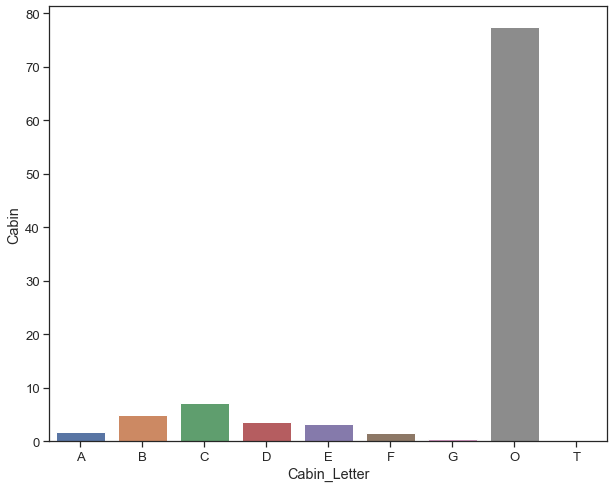

In [25]:
df_all_cabin_count = df_all.groupby(['Cabin_Letter']).count()
df_all_cabin_count = df_all_cabin_count['Cabin'].apply(lambda x: 100*x/df_all.shape[0])

df_all_cabin_count.index

plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.barplot(x = df_all_cabin_count.index,
           y = df_all_cabin_count)

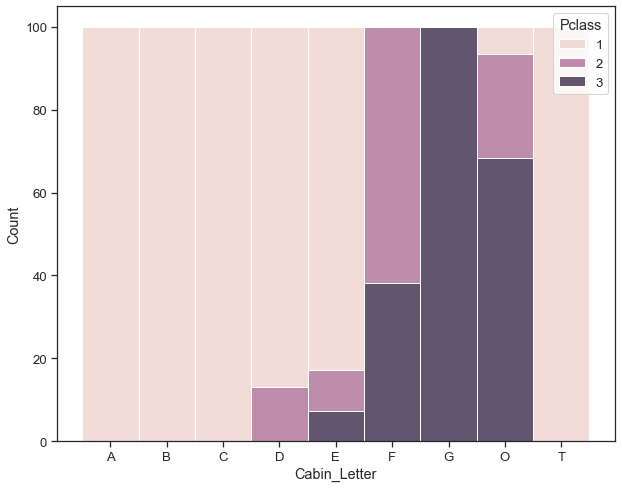

In [26]:
df_all_cabin_Pclass_count = df_all.groupby(['Cabin_Letter','Pclass']).count()
df_all_cabin_Pclass_count.reset_index(inplace = True)

Pclass_perc = []
for index, row in df_all_cabin_Pclass_count.iterrows():
    Pclass_perc.append(100*(row['Cabin']/df_all[df_all['Cabin_Letter'] == row['Cabin_Letter']]['Cabin_Letter'].count()))

df_all_cabin_Pclass_count['Cabin_Perc'] = Pclass_perc
    


plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

ax = sns.histplot(df_all_cabin_Pclass_count,
                 x = 'Cabin_Letter',
                 weights = 'Cabin_Perc',
                 hue = 'Pclass',
                 multiple = 'stack',
                 edgecolor = 'white')

<AxesSubplot:xlabel='Cabin_Letter', ylabel='Count'>

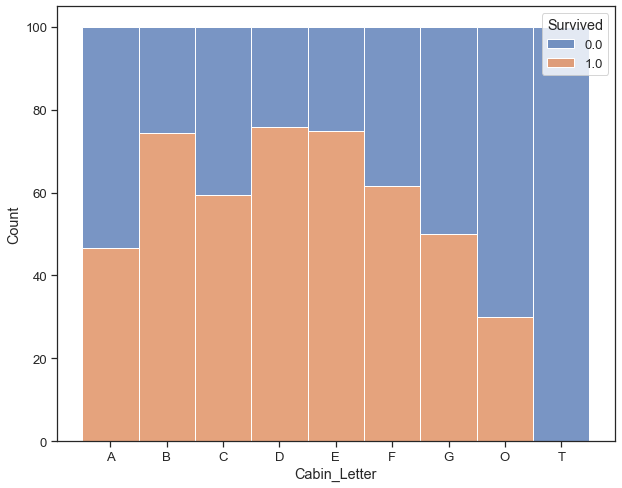

In [27]:
df_all_cabin_Survived_count = df_all.groupby(['Cabin_Letter','Survived']).count()
df_all_cabin_Survived_count.reset_index(inplace = True)

Survived_perc = []
for index, row in df_all_cabin_Survived_count.iterrows():
    Survived_perc.append(100*(row['Cabin']/df_all_cabin_Survived_count[df_all_cabin_Survived_count['Cabin_Letter'] == row['Cabin_Letter']]['Cabin'].sum()))

df_all_cabin_Survived_count['Cabin_Perc'] = Survived_perc
    


plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.histplot(df_all_cabin_Survived_count,
                 x = 'Cabin_Letter',
                 weights = 'Cabin_Perc',
                 hue = 'Survived',
                 multiple = 'stack',
                 edgecolor = 'white')

We can identify two trends using cabin:
- The cabin areas are mainly for one class, although there are some combinations.
- There is a clear correlation between the cabin and survived, for example because of the distance to the deck.

So far, we can leave the NaN as O. In next iterations I may try to improve the definition.

I will map the letters to numbers to be able to include in the exploration later and change T to O as it has just one value and can be misleading.

In [28]:
cabin_dict = {'A': 0, 'B': 1, 'C': 2,'D': 3, 'E': 4, 'F': 5,'G': 6, 'O': 7, 'T': 7}
df_all['Cabin_Letter'] = df_all['Cabin_Letter'].map(cabin_dict)

In [29]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Pclass        1309 non-null   int64  
 2   Name          1309 non-null   object 
 3   Sex           1309 non-null   int64  
 4   Age           1309 non-null   float64
 5   SibSp         1309 non-null   int64  
 6   Parch         1309 non-null   int64  
 7   Ticket        1309 non-null   object 
 8   Fare          1309 non-null   float64
 9   Cabin         1309 non-null   object 
 10  Embarked      1309 non-null   float64
 11  Cabin_Letter  1309 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 132.9+ KB


Now all the columns are completed, with no NaN values.

## 3. Data Exploration

### 3.1. Survived

In train database 38.38% died and 61.62% survived


/home/diego/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


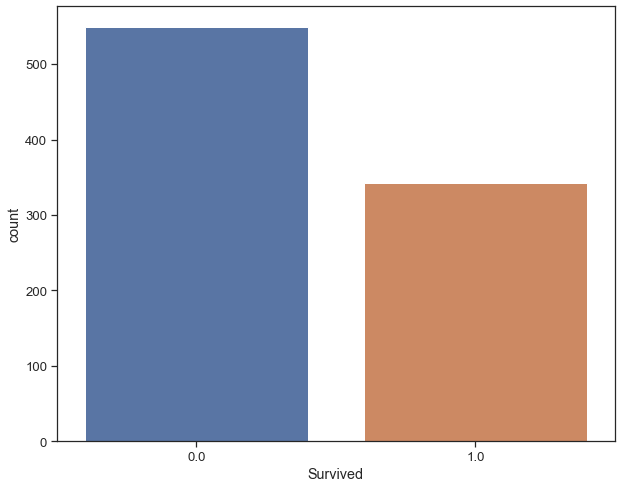

In [30]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(df_all['Survived'])
print('In train database {:.2f}% died and {:.2f}% survived'.format(100*df_train['Survived'].value_counts()[1] / df_train.shape[0],
                                                                  100*df_train['Survived'].value_counts()[0] / df_train.shape[0]))

As we can see the train database is slightly unbalanced, 61.62% to 38.38%, we may need to deal with this to improve the results.

<AxesSubplot:>

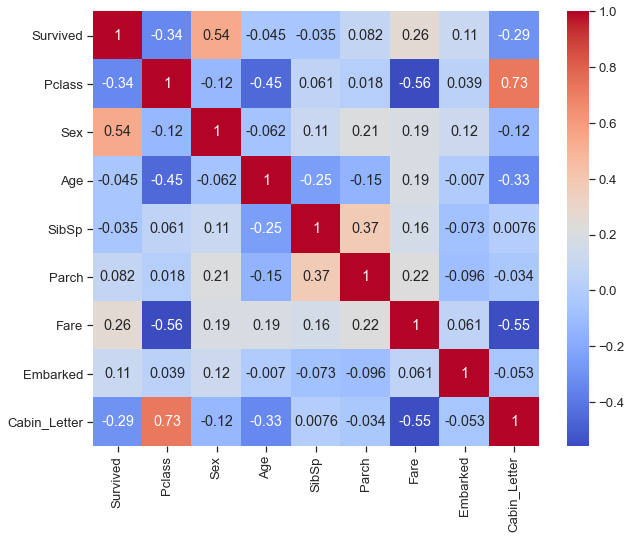

In [31]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.heatmap(df_all.corr(),
           annot = True,
           cmap = 'coolwarm')

Survived shows a clear correlation with Pclass, Sex, Cabin and Fare, all highly related with the socio-economic status.

### 3.2. Pclass

Pclass is a categorical ordinal data. We can study how survived rate is distributed in each class.

Also Pclass show a big correlation with Fare and Age, so we can have a look to see this distribution.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

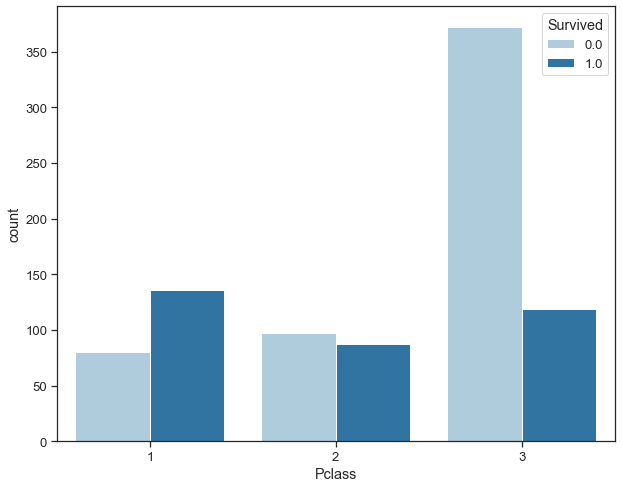

In [32]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all,
             x = 'Pclass',
             hue = 'Survived',
             palette = 'Paired')

We can see that being on 3rd class you are very likely to not survive, whereas in the other two classes the probabilities are more balanced. Also as it is logical there are many more people in 3rd class than in any other.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

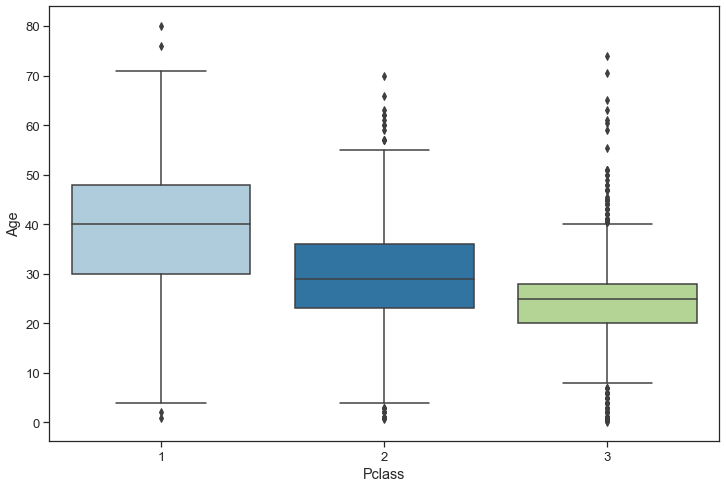

In [33]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.boxplot(data = df_all,
            x = 'Pclass',
            y = 'Age',
            palette = 'Paired')

We can see how the median of the first class is the highest with most of the people (25%-75%) between 30 and 50 years old. Not many outlayers, although the extreme quartiles covers almost the whole range because there are some children and elder people.

Second class is similar but with main body of the box slightly younger and the extremes not so spread.

The 3rd class as expected is the youngest one, but without children and babies and just elder people as outliers.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

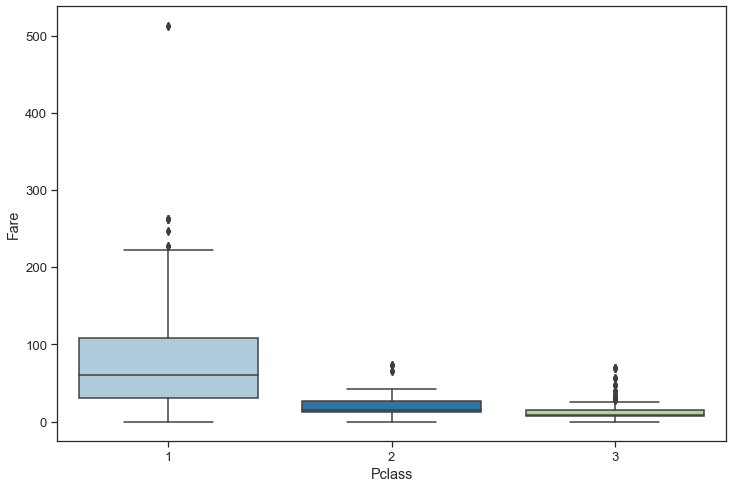

In [34]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.boxplot(data = df_all,
            x = 'Pclass',
            y = 'Fare',
            palette = 'Paired')

As expected the higher the class the higher the fare. Although 3rd class is very condensed in a small range, similar than the 2nd class (just slightly more expensive), the 1st class shows bigger spread with some very big outliers.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

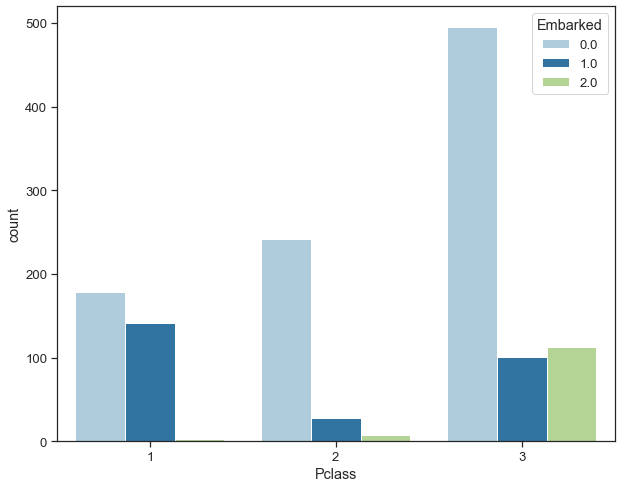

In [63]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all,
             x = 'Pclass',
             hue = 'Embarked',
             palette = 'Paired')

Most of the people embarking from S and Q ae at 3rd class, whereas more than half of the people embarking from C are mostly in first. This must be reflected in Fare feature.

### 3.3. Sex

Sex is a categorical, let's see its distribution regarding survived feature.

<AxesSubplot:xlabel='Sex', ylabel='count'>

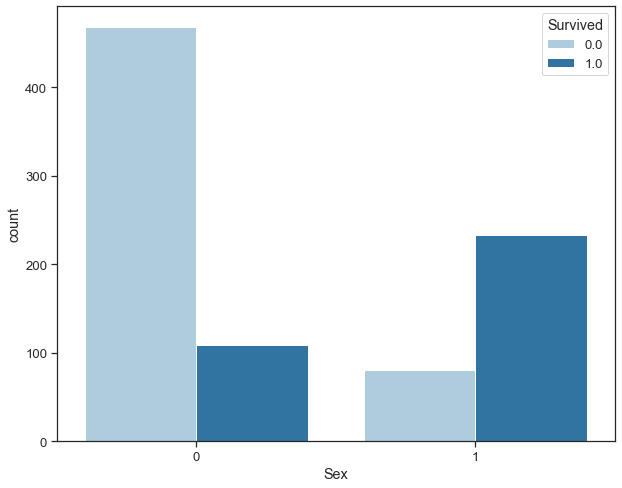

In [35]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all,
             x = 'Sex',
             hue = 'Survived',
             palette = 'Paired')

There are more males (0) than females (0) but there are more survived females than males.

Being a woman, it is very likely to survive, where being a man the probability of dying is quite high.

Let's check the distribution of sex by Pclass.

<AxesSubplot:xlabel='Sex', ylabel='count'>

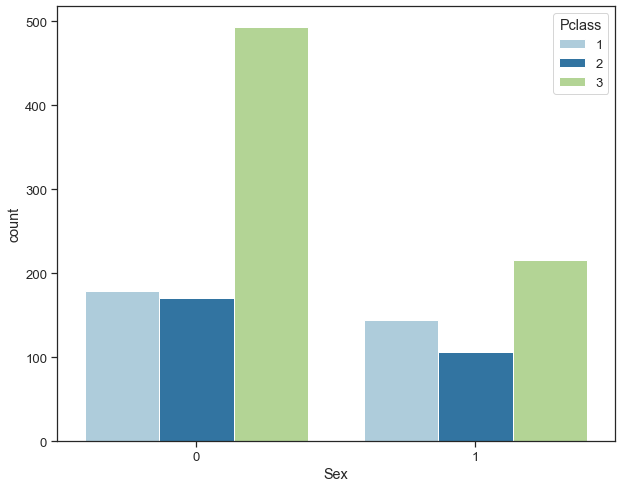

In [36]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all,
             x = 'Sex',
             hue = 'Pclass',
             palette = 'Paired')

Males are clearly in higher proportion in 3rd class, maybe it has a big influence in the survive rate of males.

Females are quite evenly distributed in the 3 classes, although slightly more in 3rd class.

Let's check its relation with embarkment feature

<AxesSubplot:xlabel='Sex', ylabel='count'>

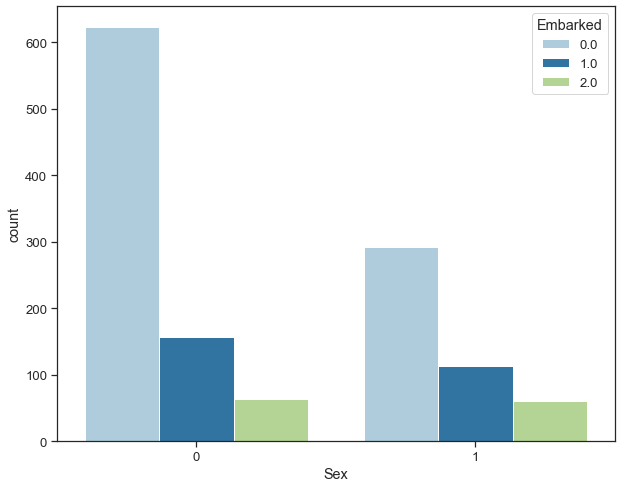

In [37]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all,
             x = 'Sex',
             hue = 'Embarked',
             palette = 'Paired')

As in previous categories, males come from 'S' in a high proportion, then 'C' and lastly 'Q'. It follows the total trend also.

Female shows similar distribution, a bit more even than males.

Now let's check the distribution in cabins.

<AxesSubplot:xlabel='Sex', ylabel='count'>

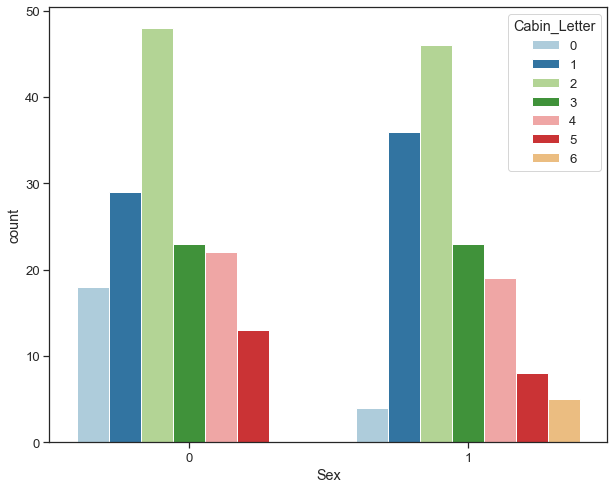

In [38]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all.drop(df_all[df_all['Cabin_Letter'] == 7].index, axis = 0),
             x = 'Sex',
             hue = 'Cabin_Letter',
             palette = 'Paired')

I have dropped the category Other from this analysis because it makes very difficult to extract insight, I will study it separatelly.

In general the distribution is very similar, just in Cabin A where there are almost no females and Cabin G, where there are ni males.

<AxesSubplot:xlabel='Sex', ylabel='count'>

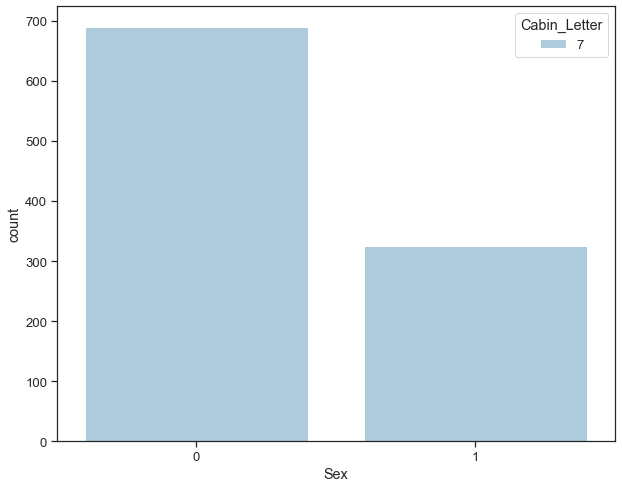

In [39]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all.drop(df_all[df_all['Cabin_Letter'] != 7].index, axis = 0),
             x = 'Sex',
             hue = 'Cabin_Letter',
             palette = 'Paired')

The distribution of sex in category Other (missing Cabin info) is around double of males, what is not so different than the distribution in the boat as a whole. Therefore this does not give us much value.

We can study the sex feature with respect of Parch (number of parents and children).

<AxesSubplot:xlabel='Sex', ylabel='Parch'>

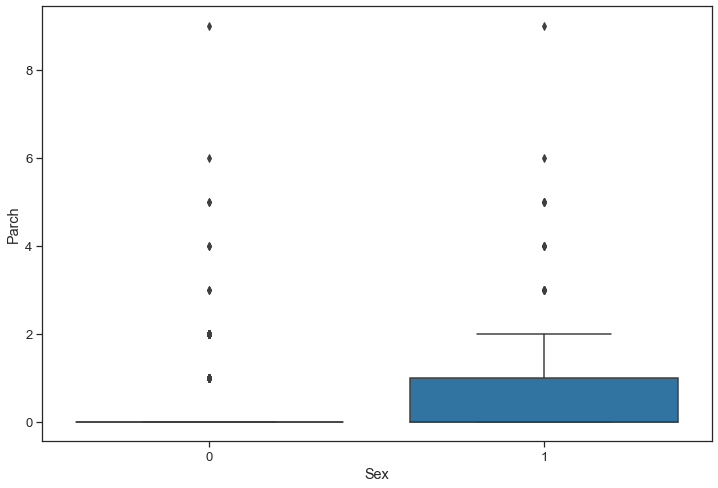

In [40]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.boxplot(data = df_all,
            x = 'Sex',
            y = 'Parch',
            palette = 'Paired')

It is interesting that most of the males traveling does not have parents or children in the boat. Females mostly are between 0-2, around 50% travel without children or parents and the other 50% with 1 or 2, I suppose children.

Let's check the distribution with SibSp

<AxesSubplot:xlabel='Sex', ylabel='SibSp'>

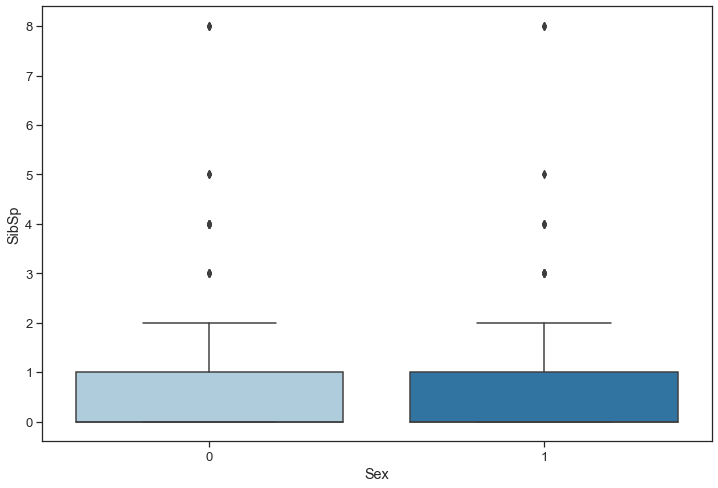

In [41]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.boxplot(data = df_all,
            x = 'Sex',
            y = 'SibSp',
            palette = 'Paired')

The distribution is really similar between male and females, it is logical as if the male travels with his spouse, also the female will have that accounted.

Let's study now the Sex feature with respect of Age

<Figure size 864x576 with 0 Axes>

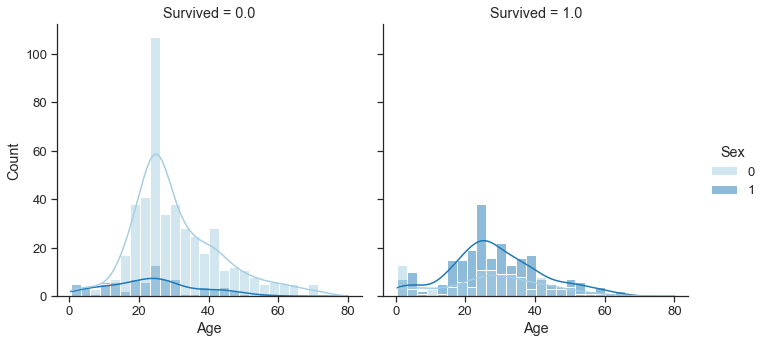

In [42]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.displot(data = df_all,
            x = 'Age',
            hue = 'Sex',
            palette = 'Paired',
            kind = 'hist',
            kde = True,
            col = 'Survived')

In this graph we can identify some skewness to the left on died males, most of them were young people in their 20s, where very little under 14-15 died.

Died female shows quite small and flat distribution compared with male one.

Survived male and female looks to be close to a normal distribution both centered in the 25-30s.

### 3.3. Age

First we can see the influence of age on survival feature and where it has its most influence.

<Figure size 864x576 with 0 Axes>

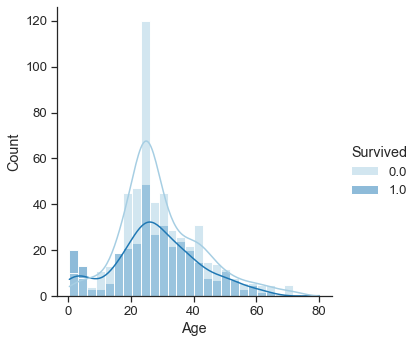

In [43]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.displot(data = df_all,
            x = 'Age',
            hue = 'Survived',
            palette = 'Paired',
            kind = 'hist',
            kde = True)

Both died and survived are slightly skewed to the left, but still children and elder people looks to have a mortality rate close to 50% but between 20 and 40 the probability to die is much higher. Seems that young people stayed longer in the boat helping to evacuate. Also most young people were in 3rd class that also had a high mortality, also because their cabins are more likely to be far from the deck.

Let's see age distribution with respect of parents and children in the boat.

<AxesSubplot:xlabel='Parch', ylabel='Age'>

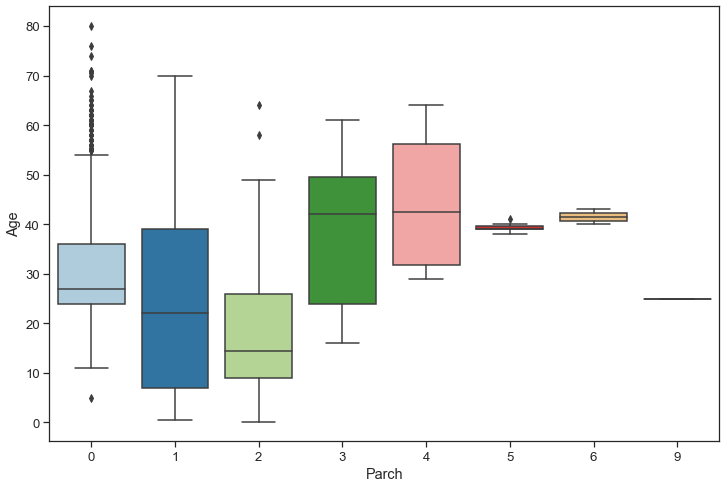

In [44]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.boxplot(data = df_all,
            x = 'Parch',
            y = 'Age',
            palette = 'Paired')

The distribution is quite interesting:
- People traveling without parents or children are mostly in the 20-35.
- People traveling with 1 parent or children are mainly from 0 to 40, probably a mix of children and young people with one child.
- People traveling with 2 parents or children are mostly children traveling with its parents.
- From 3 onwards they seems to be mostly people traveling with its children.

Let's see the distribution with respect of Siblings and Spouse.

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

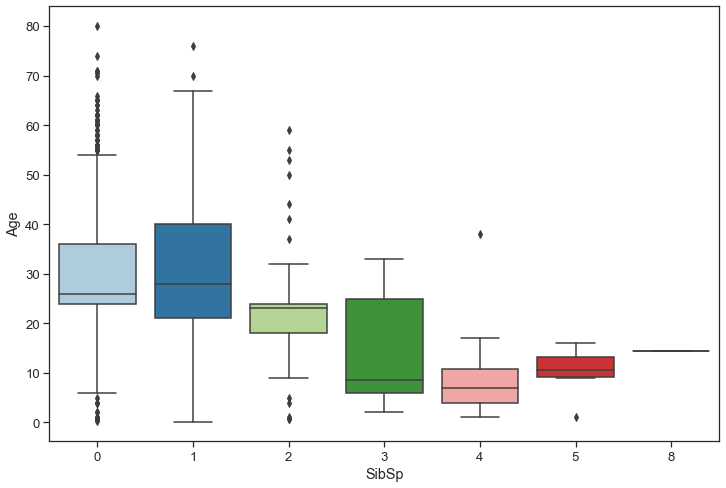

In [46]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.boxplot(data = df_all,
            x = 'SibSp',
            y = 'Age',
            palette = 'Paired')

Again it is logical that the people traveling alone or with 1 sibling/spouse is mainly within the range of 20 to 40 because is when the people can travel alone or have just an spouse. But from 2 onwards the age distribution decreases showing that the higher the SibSp the more likely the be younger or even a child.

### 3.4. SibSp

Lets study the feature SibSp that shows the amount of siblings or spouse that a passenger is traveling with. Some of the relations has been studied already.

We can start with Cabin_Letter, again I study the Other category separatelly to see if we can get some insight.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

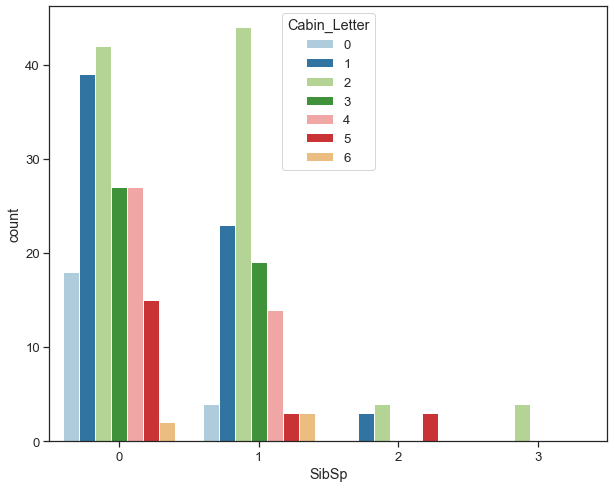

In [47]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all.drop(df_all[df_all['Cabin_Letter'] == 7].index, axis = 0),
             x = 'SibSp',
             hue = 'Cabin_Letter',
             palette = 'Paired')

As most of the Cabins are in the "Other" category, there is not much insight in this graph.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

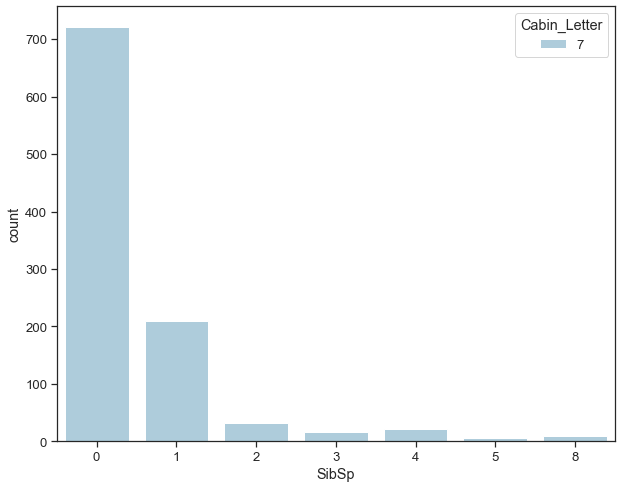

In [48]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all.drop(df_all[df_all['Cabin_Letter'] != 7].index, axis = 0),
             x = 'SibSp',
             hue = 'Cabin_Letter',
             palette = 'Paired')

Basically, it follows a similar distribution than the SibSp alone, therefore no insight in this graph.

Let's try now with Embarked, maybe families embarked more from a specific port.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

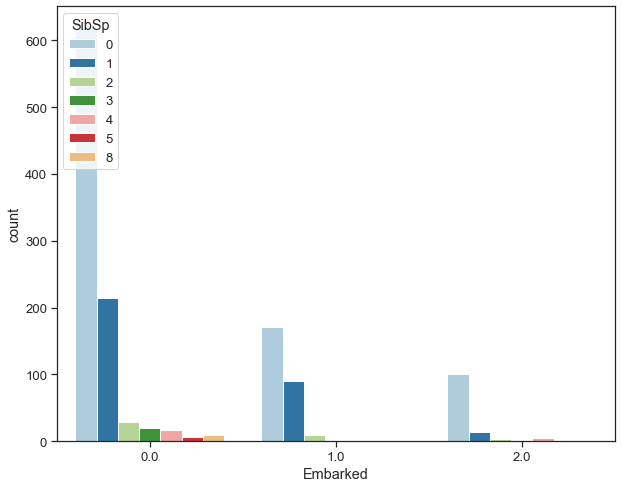

In [50]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all,
             x = 'Embarked',
             hue = 'SibSp',
             palette = 'Paired')

 Most of the people traveling in family embarked in S.

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

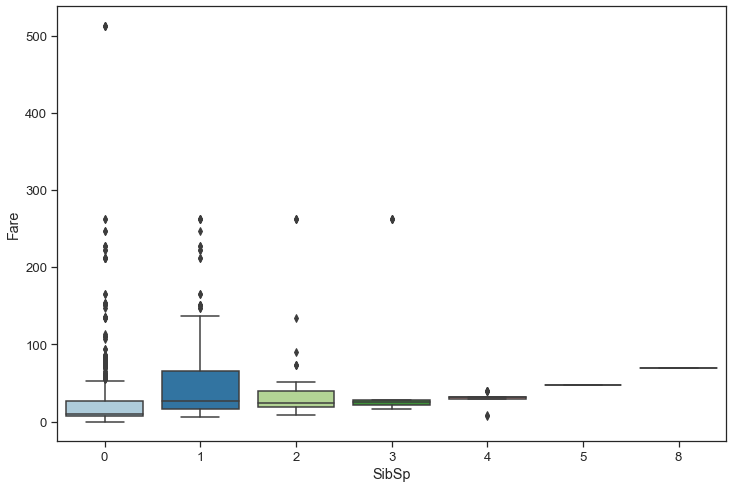

In [51]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.boxplot(data = df_all,
            x = 'SibSp',
            y = 'Fare',
            palette = 'Paired')

There is no clear difference in the price of your ticket depending of if you travel alone or with SibSp.

<AxesSubplot:xlabel='Parch', ylabel='count'>

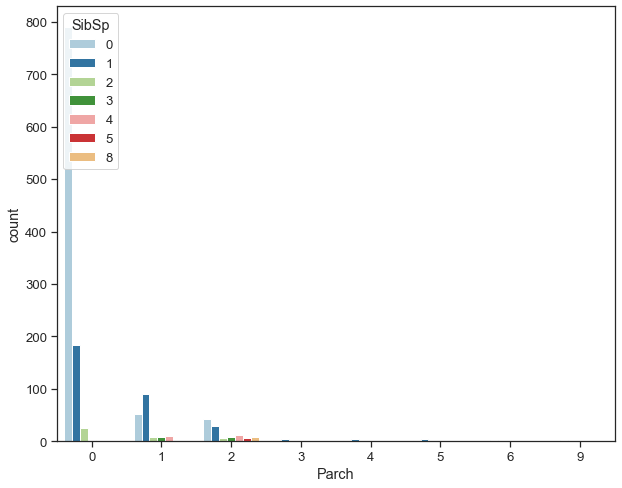

In [52]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all,
             x = 'Parch',
             hue = 'SibSp',
             palette = 'Paired')

It is interesting to see how people traveling without SibSp or with just one is mainly traveling also without children or parents. Aslo that most of the families (Parch>1) are also mainly with 1 or 2 SibSp (just parents or parents plus a sibling).

We can see how Parch and SibSp have more sense when they are looked together, therefor it is possible to join as "family" in feature engineering section.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

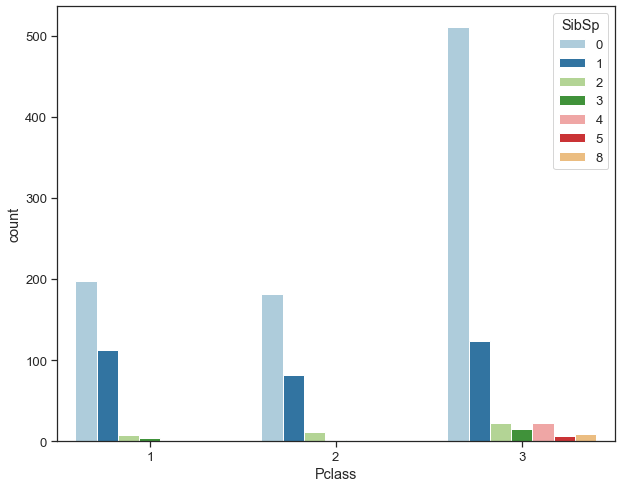

In [53]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all,
             x = 'Pclass',
             hue = 'SibSp',
             palette = 'Paired')

It is interesting how most of the families are in 3rd class. Just people traveling alone or with SibSp (I guess spouse) travel in first and second class.

### 3.5. Parch

Lets see now Parent and Children feature, I suppose as SibSp it would make more sense if joined.

<AxesSubplot:xlabel='Parch', ylabel='count'>

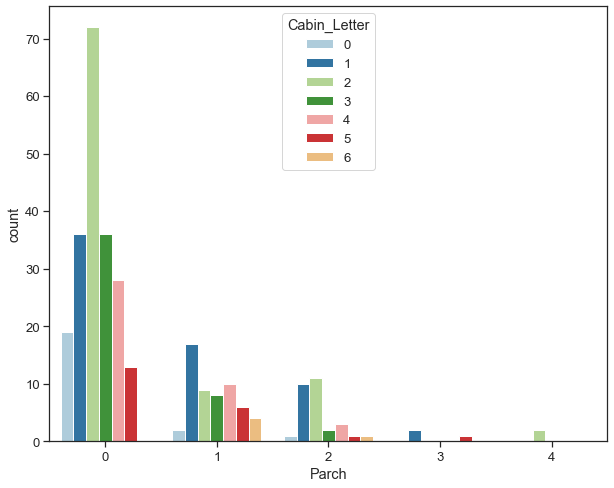

In [56]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all.drop(df_all[df_all['Cabin_Letter'] == 7].index, axis = 0),
             x = 'Parch',
             hue = 'Cabin_Letter',
             palette = 'Paired')

<AxesSubplot:xlabel='Parch', ylabel='count'>

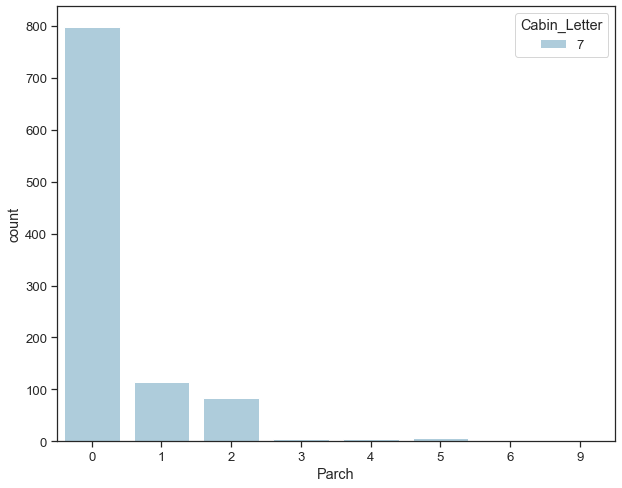

In [57]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all.drop(df_all[df_all['Cabin_Letter'] != 7].index, axis = 0),
             x = 'Parch',
             hue = 'Cabin_Letter',
             palette = 'Paired')

The result is similar to SibSp, not very insightful as most of the people is in the missing category.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

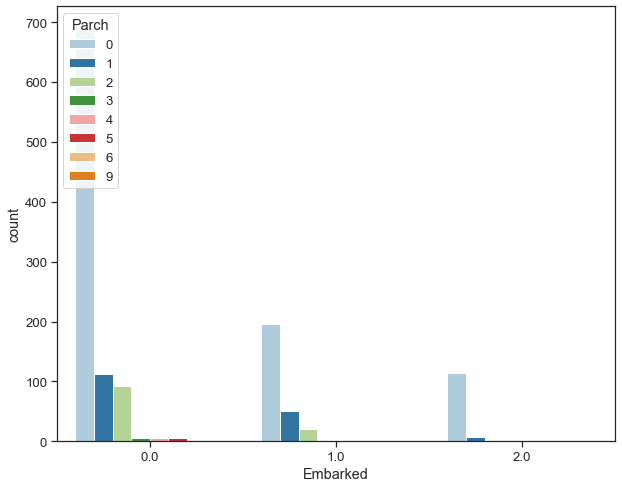

In [58]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all,
             x = 'Embarked',
             hue = 'Parch',
             palette = 'Paired')

Same as with SibSp, most of the families embarked from S

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

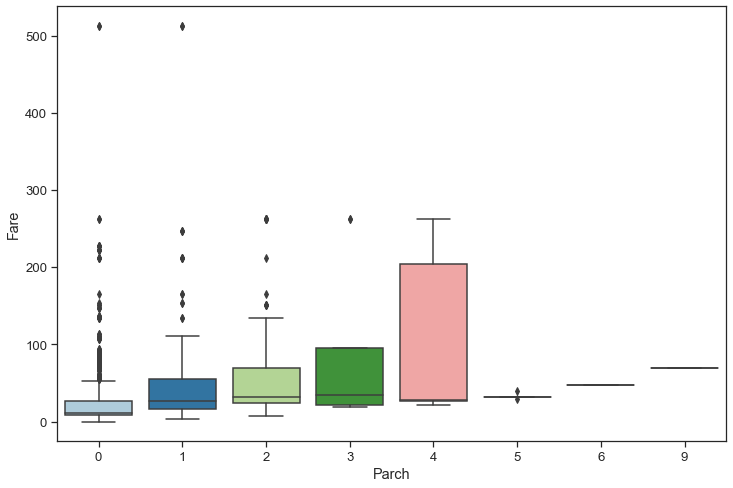

In [59]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.boxplot(data = df_all,
            x = 'Parch',
            y = 'Fare',
            palette = 'Paired')

In this case, it is interesting to see how the people traveling in families pays more. It might be related to Pclass as well.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

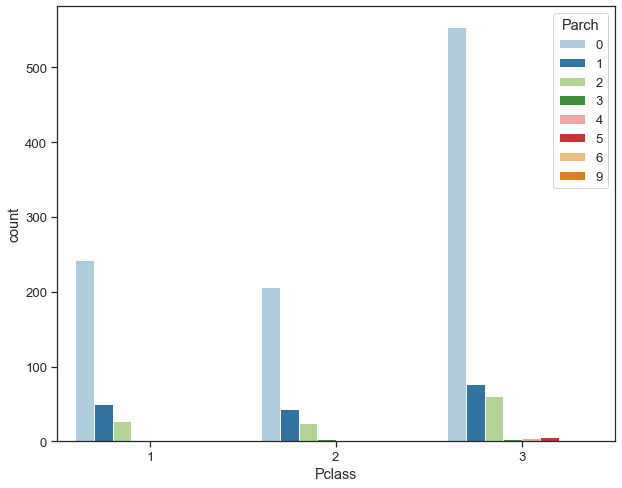

In [60]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all,
             x = 'Pclass',
             hue = 'Parch',
             palette = 'Paired')

The opposite as expected, most of the families are in 3rd class. Maybe the fare was higher because it was counted as altogether.

### 3.6. Fare

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

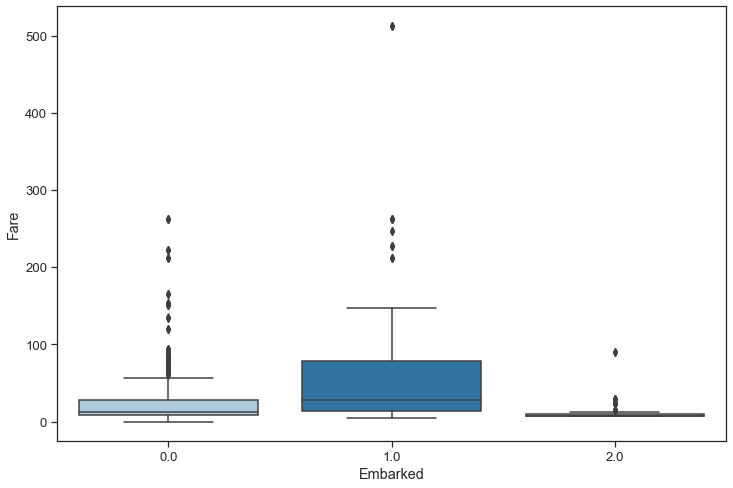

In [61]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.boxplot(data = df_all,
            x = 'Embarked',
            y = 'Fare',
            palette = 'Paired')

Most of the people embarked at C pays more than the ones embarked at S and Q, this is completely connected with the distribution of Pclass with Embarked.

<Figure size 1296x864 with 0 Axes>

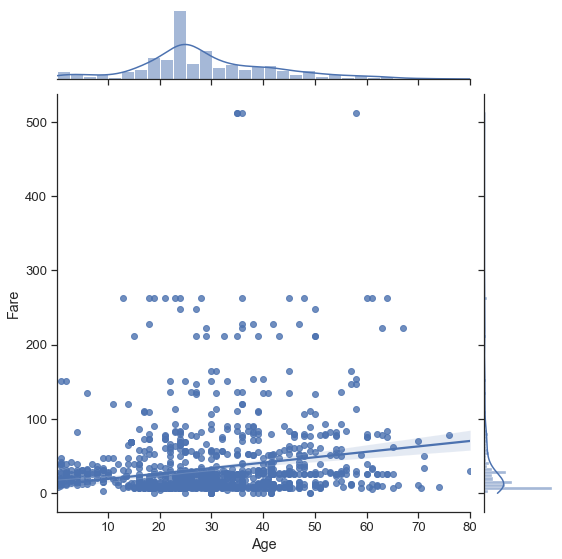

In [74]:
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.jointplot(data = df_all,
            x = 'Age',
            y = 'Fare',
            palette = 'Paired',
#            hue = 'Survived',
             height = 8,
             kind = 'reg')

There is not very clear correlation between fare and age, in general the older the more expensive the ticket is. But low correlated.

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

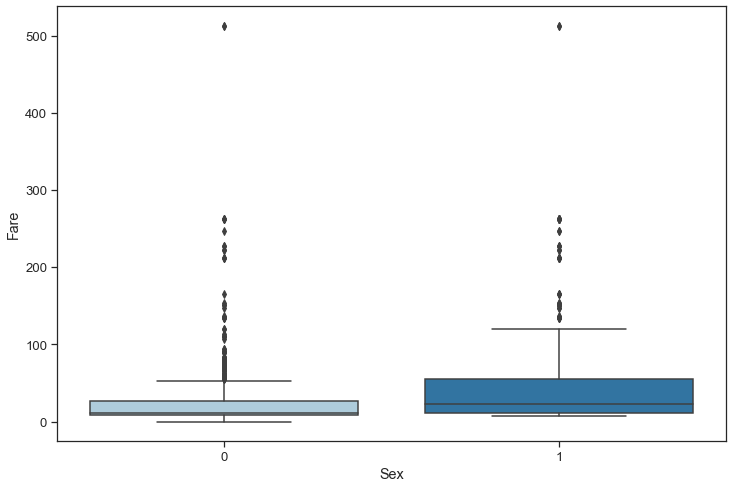

In [75]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.boxplot(data = df_all,
            x = 'Sex',
            y = 'Fare',
            palette = 'Paired')

The females generally pay more for their tickets, although it is also related to the fact that most males were in 3rd class(cheaper) and many females were traveling with children also (sometimes counted ticket together)

### 3.7. Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

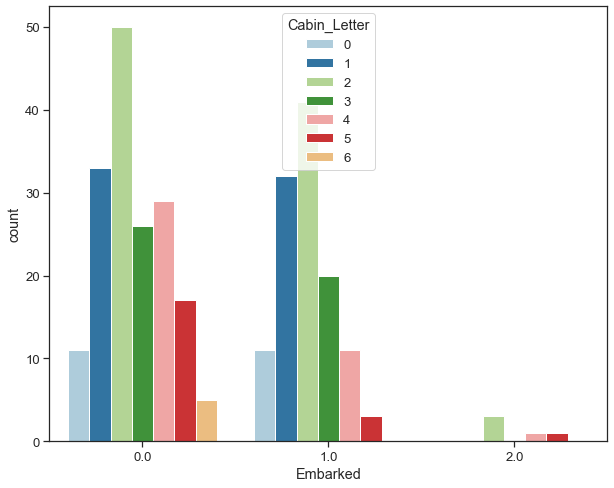

In [77]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all.drop(df_all[df_all['Cabin_Letter'] == 7].index, axis = 0),
             x = 'Embarked',
             hue = 'Cabin_Letter',
             palette = 'Paired')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

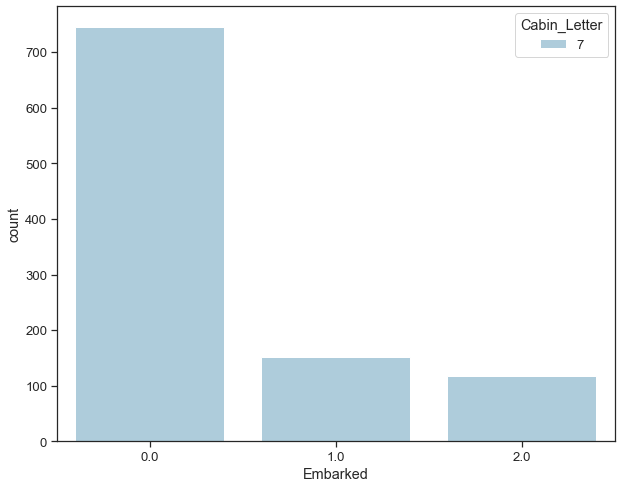

In [79]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all.drop(df_all[df_all['Cabin_Letter'] != 7].index, axis = 0),
             x = 'Embarked',
             hue = 'Cabin_Letter',
             palette = 'Paired')

It is interesting that most of the missing cabin people embarked from S, although it was also where most of the people embarked.

### 3.8. Cabin

<AxesSubplot:xlabel='Cabin_Letter', ylabel='Age'>

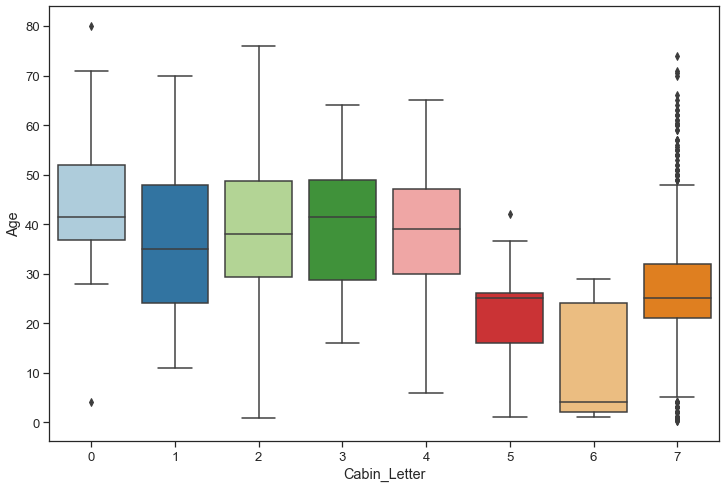

In [80]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.boxplot(data = df_all,
            x = 'Cabin_Letter',
            y = 'Age',
            palette = 'Paired')

The missing value cabin seems to cover the whole range of age in a similar distribution.

It is interesting how the 5 first cabins are used by passengers around its 40s but in the number 5 and mainly 6 most are childre.

<AxesSubplot:xlabel='Cabin_Letter', ylabel='Fare'>

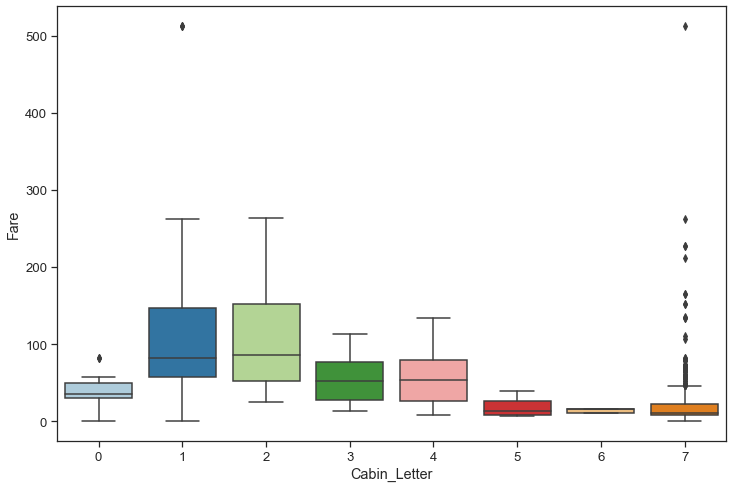

In [81]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.boxplot(data = df_all,
            x = 'Cabin_Letter',
            y = 'Fare',
            palette = 'Paired')

Again, the missing cabin value shows a similar distribution as the whole sample fare but then there is a clear difference between cabin areas and the distribution is really correlated with Pclass as well.

We may be able to do some sort of estimation for cabin letter based on all this parameters.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

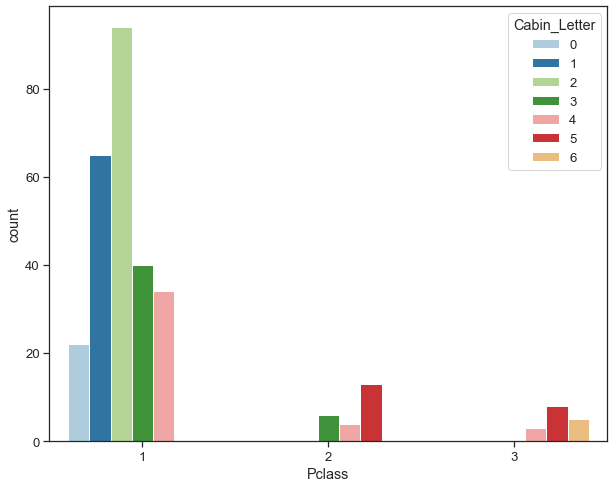

In [82]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all.drop(df_all[df_all['Cabin_Letter'] == 7].index, axis = 0),
             x = 'Pclass',
             hue = 'Cabin_Letter',
             palette = 'Paired')

As expected, cabin 6 is fully 3rd class, then 5 is shared between 3 and 2 and the rest are mainly first class.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

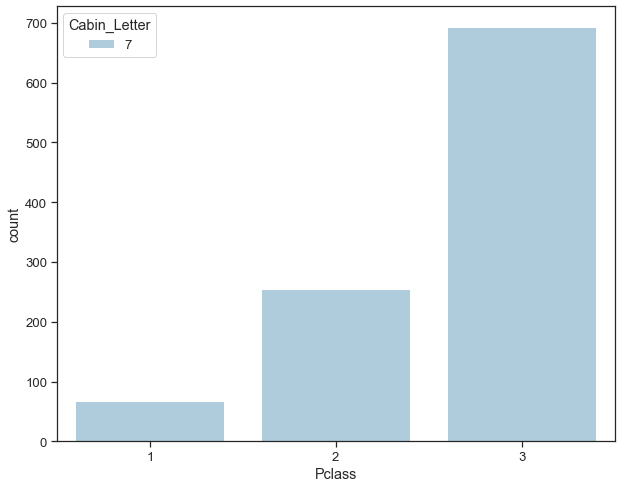

In [83]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.countplot(data = df_all.drop(df_all[df_all['Cabin_Letter'] != 7].index, axis = 0),
             x = 'Pclass',
             hue = 'Cabin_Letter',
             palette = 'Paired')

Being the missing cabin mostly of 3rd class, i guess most of the people belongs to cabin 5-6.

## 4. Save Clean Data

In [93]:
df_train = df_all[df_all.index <= len(idx_train)]
df_test = df_all[df_all.index > len(idx_train)]

In [94]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Other,0.0,7
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Other,0.0,7
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,2
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Other,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0.0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,Other,0.0,7
888,1.0,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0,1
889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,13.5,1,2,W./C. 6607,23.4500,Other,0.0,7


In [95]:
df_test

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter
PassengerId,,,,,,,,,,,,
892,NaN,3,"Kelly, Mr. James",0,34.50,0,0,330911,7.8292,Other,2.0,7
893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00,1,0,363272,7.0000,Other,0.0,7
894,NaN,2,"Myles, Mr. Thomas Francis",0,62.00,0,0,240276,9.6875,Other,2.0,7
895,NaN,3,"Wirz, Mr. Albert",0,27.00,0,0,315154,8.6625,Other,0.0,7
896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00,1,1,3101298,12.2875,Other,0.0,7
897,NaN,3,"Svensson, Mr. Johan Cervin",0,14.00,0,0,7538,9.2250,Other,0.0,7
898,NaN,3,"Connolly, Miss. Kate",1,30.00,0,0,330972,7.6292,Other,2.0,7
899,NaN,2,"Caldwell, Mr. Albert Francis",0,26.00,1,1,248738,29.0000,Other,0.0,7
900,NaN,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.00,0,0,2657,7.2292,Other,1.0,7


In [97]:
df_train.to_csv('data/train_clean.csv')
df_test.to_csv('data/test_clean.csv')